# COGS 108 - EDA Checkpoint

# Names

- Jonathan Cheung
- Joshua Chuang
- Joyce Hu
- Ester Tsai
- Sam Wong

## Note:

**Old project research question:** Does the sentiment of a US president's Wikipedia page (based on a sentiment score) correlate to their average presidential approval ratings (according to Gallup poll)? (FDR to Biden)

**New project research question:** Which factor, among factors such as director, genre, and sentiment analysis of the plot, has the highest correlation with American film's box office sale?

**Our team chose to pursue a different project research question than our project proposal for the following reasons:**
- The old dataset only has information on 16 presidents (only 16 rows of data after aggregation), so there is not enough data to work with. The new dataset on American films can easily have more than a few thousand rows. 
- The old research question has the issue "no explanation of why the hypothesis was chosen. You should explain the rationale behind the hypothesis." So for our new research question, we will have a stronger rationale behind the hypothesis than the old hypothesis.

### Hypothesis

We hypothesize that American films with more extreme sentiment values have a higher association with higher box office sales than other film characteristics because viewers are more enticed by dramatic film plots. 

<a id='research_question'></a>
# Research Question

Which factor, among factors such as director, genre, and sentiment analysis of the plot, has the highest correlation with American film's box office sale?

# Dataset(s)

- Dataset Name: "American Films.csv"
- Link to the dataset: Web scraped from Wikipedia, so there is no link
- Number of observations: 2521

This dataset was scraped from the Wikipeida page "American Films by Genre" (https://en.wikipedia.org/wiki/Category:American_films_by_genre). It contains the variables 'Film name', 'Genre', 'Plot', 'Directed by', 'Written by', 'Story by', 'Produced by', 'Starring', 'Cinematography', 'Edited by', 'Music by', 'Production company', 'Distributed by', 'Duration (min)', 'Release year', 'Budget (mil dollar)', 'Box office (mil dollar)', 'VADER Sentiment', 'TextBlob Subjectivity', and 'TextBlob Polarity'. It has been filtered to include only the films that have vaild box office values.

# Setup

In [1]:

# Basic libraries
import numpy as np

# Pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Data visualization
import seaborn as sns
sns.set(font_scale=2, style="white")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

# Webscraping
import requests
from bs4 import BeautifulSoup

# Textual and sentiment analysis
import re

#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#from textblob import TextBlob

import nltk
nltk.download('punkt')
#from LeXmo import LeXmo


# Improve resolution
%config InlineBackend.figure_format ='retina'

# Ignore wanrnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/joh011/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Cleaning

## 1) Import Scraped Dataset

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

## Sentiment Analysis EDA

In [2]:
df = pd.read_csv('American Films.csv')
df

,Film name,Genre,Plot,Directed by,Written by,Story by,Produced by,Starring,Cinematography,Edited by,Music by,Production company,Distributed by,Release date,Running time,Budget,Box office,Duration (min),Release year,Budget (mil dollar),Box office (mil dollar),VADER Sentiment,VADER negative,VADER neutral,VADER positive,VADER compound,VADER compound (absolute value),TextBlob subjectivity,TextBlob polarity
0,The 2nd (film),Action,"While picking up his son at his college dorm, ...",Brian Skiba,Eric Bromberg,NaN,Geoffrey James Clark,Ryan Phillippe,Adam Biddle,Scott Conrad,Richard Patrick,NaN,Momentum Pictures,"September 1, 2020",93 minutes,NaN,"$12,604",93.0,2020.0,NaN,0.012604,"{'neg': 0.056, 'neu': 0.804, 'pos': 0.139, 'co...",0.056,0.804,0.139,0.7845,0.7845,0.450000,0.016667
1,12 Rounds (film),Action,A sting operation to capture arms dealer Miles...,Renny Harlin,Daniel Kunka,NaN,Becki Cross Trujillo,John Cena,David Boyd,Brian Berdan,Trevor Rabin,NaN,20th Century Fox,NaN,109 minutes,$6.7 million,$17.3 million,109.0,NaN,6.70,17.300000,"{'neg': 0.071, 'neu': 0.873, 'pos': 0.056, 'co...",0.071,0.873,0.056,-0.9610,0.9610,0.385748,-0.084798
2,13 Minutes (2021 film),Action,Four families in the fictional Oklahoma town o...,Lindsay Gossling,Lindsay Gossling,Travis Farncombe,Lindsay Gossling,Trace Adkins,Steve Mason,Lisa Grootenboer,Ariel Marx,NaN,Quiver Distribution,"October 29, 2021",108 minutes,NaN,"$67,413",108.0,2021.0,NaN,0.067413,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",0.263,0.737,0.000,-0.9524,0.9524,0.431250,-0.031250
3,Aces: Iron Eagle III,Action,U.S. Air Force Brigadier General Charles 'Chap...,John Glen,Kevin Alyn Elders,NaN,Ron Samuels,Louis Gossett Jr.,Alec Mills,Bernard Gribble,Harry Manfredini,NaN,Seven Arts (through New Line Cinema),NaN,98 minutes,$13.5 million,$2.5 million,98.0,NaN,13.50,2.500000,"{'neg': 0.088, 'neu': 0.861, 'pos': 0.051, 'co...",0.088,0.861,0.051,-0.9872,0.9872,0.338125,-0.053258
4,American Ninja,Action,"As an alternative to prison, young American Jo...",Sam Firstenberg,Paul De Mielche (screenplay),NaN,Yoram Globus,Michael Dudikoff,Hanania Baer,Andy Horvitch,Michael Linn,NaN,Cannon Film Distributors,"August 30, 1985",95 minutes,"$1,000,000 (est.)","$10,499,694 (domestic)",95.0,1985.0,1.00,10.499694,"{'neg': 0.161, 'neu': 0.789, 'pos': 0.05, 'com...",0.161,0.789,0.050,-0.9981,0.9981,0.429046,-0.088511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,The Young Messiah,Drama,Seven-year-old Jesus is playing in Alexandria ...,Cyrus Nowrasteh,Cyrus Nowrasteh,NaN,Michael Barnathan,Adam Greaves-Neal,Joel Ransom,Geoffrey Rowland,John Debney,NaN,Focus Features,"March 11, 2016",111 minutes,$18.5 million,$7.3 million,111.0,2016.0,18.50,7.300000,"{'neg': 0.131, 'neu': 0.807, 'pos': 0.062, 'co...",0.131,0.807,0.062,-0.9946,0.9946,0.377682,0.033788
2490,The Young Philadelphians,Drama,Newlywed Kate Judson Lawrence (Diane Brewster)...,Vincent Sherman,NaN,NaN,James Gunn,Paul Newman,Harry Stradling,William H. Ziegler,Ernest Gold,NaN,Warner Bros. Pictures,"May 19, 1959",136 minutes,NaN,$2.8 million (est. US/ Canada rentals),136.0,1959.0,NaN,2.800000,"{'neg': 0.149, 'neu': 0.704, 'pos': 0.147, 'co...",0.149,0.704,0.147,-0.5300,0.5300,0.472809,0.126522
2491,Zabriskie Point (film),Drama,"In a room at a university campus in 1970, whit...",Michelangelo Antonioni,NaN,Michelangelo Antonioni,Carlo Ponti,Mark Frechette,Alfio Contini,Franco Arcalli,John Fahey,NaN,Metro-Goldwyn-Mayer,NaN,112 minutes,$7 million,$1 million[Note 1],112.0,NaN,7.00,1.000000,"{'neg': 0.117, 'neu': 0.801, 'pos': 0.082, 'co...",0.117,0.801,0.082,-0.9864,0.9864,0.375393,0.044276
2492,Zero Day (2003 film),Drama,"Andre Kriegman (Born July 17, 1982) and Calvin...",Ben Coccio,Ben Coccio,NaN,Ben Coccio,Andre Keuck,NaN,NaN,NaN,NaN,Avatar Films,"September 3, 2003",92 minutes,"$20,000","$8,466",92.0,2003.0,0.02,0.008466,"{'neg': 0.112, 'neu': 0.849, 'pos': 0.039, 'co...",0.112,0.8

Note: For all the categorical values we plan to analyze, perform statistical tests on, or create machine learning models with, we may need to perform one-hot encoding to create quantitative values. But we will perform that step after EDA as needed.

### Exploration of VADER Sentiment Distribution

Information from VADER documentation: 
- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

In [36]:
df[['VADER negative', 'VADER neutral', 'VADER positive', 'VADER compound', 'VADER compound (absolute value)', 
  'TextBlob subjectivity', 'TextBlob polarity']].describe()

,VADER negative,VADER neutral,VADER positive,VADER compound,VADER compound (absolute value),TextBlob subjectivity,TextBlob polarity
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000
mean,0.119198,0.799682,0.081133,-0.436768,0.849927,0.412692,0.030365
std,0.050750,0.057394,0.040236,0.768220,0.241534,0.111112,0.097858
min,0.000000,0.521000,0.000000,-0.999800,0.000000,0.000000,-0.645833
25%,0.085000,0.763250,0.055000,-0.994600,0.817850,0.352345,-0.023375
50%,0.115000,0.800000,0.077000,-0.943650,0.972300,0.413395,0.022234
75%,0.152000,0.834000,0.103000,0.251200,0.994900,0.473320,0.081329
max,0.333000,1.000000,0.322000,0.999600,0.999800,1.000000,0.675000


<AxesSubplot:xlabel='VADER compound', ylabel='Count'>

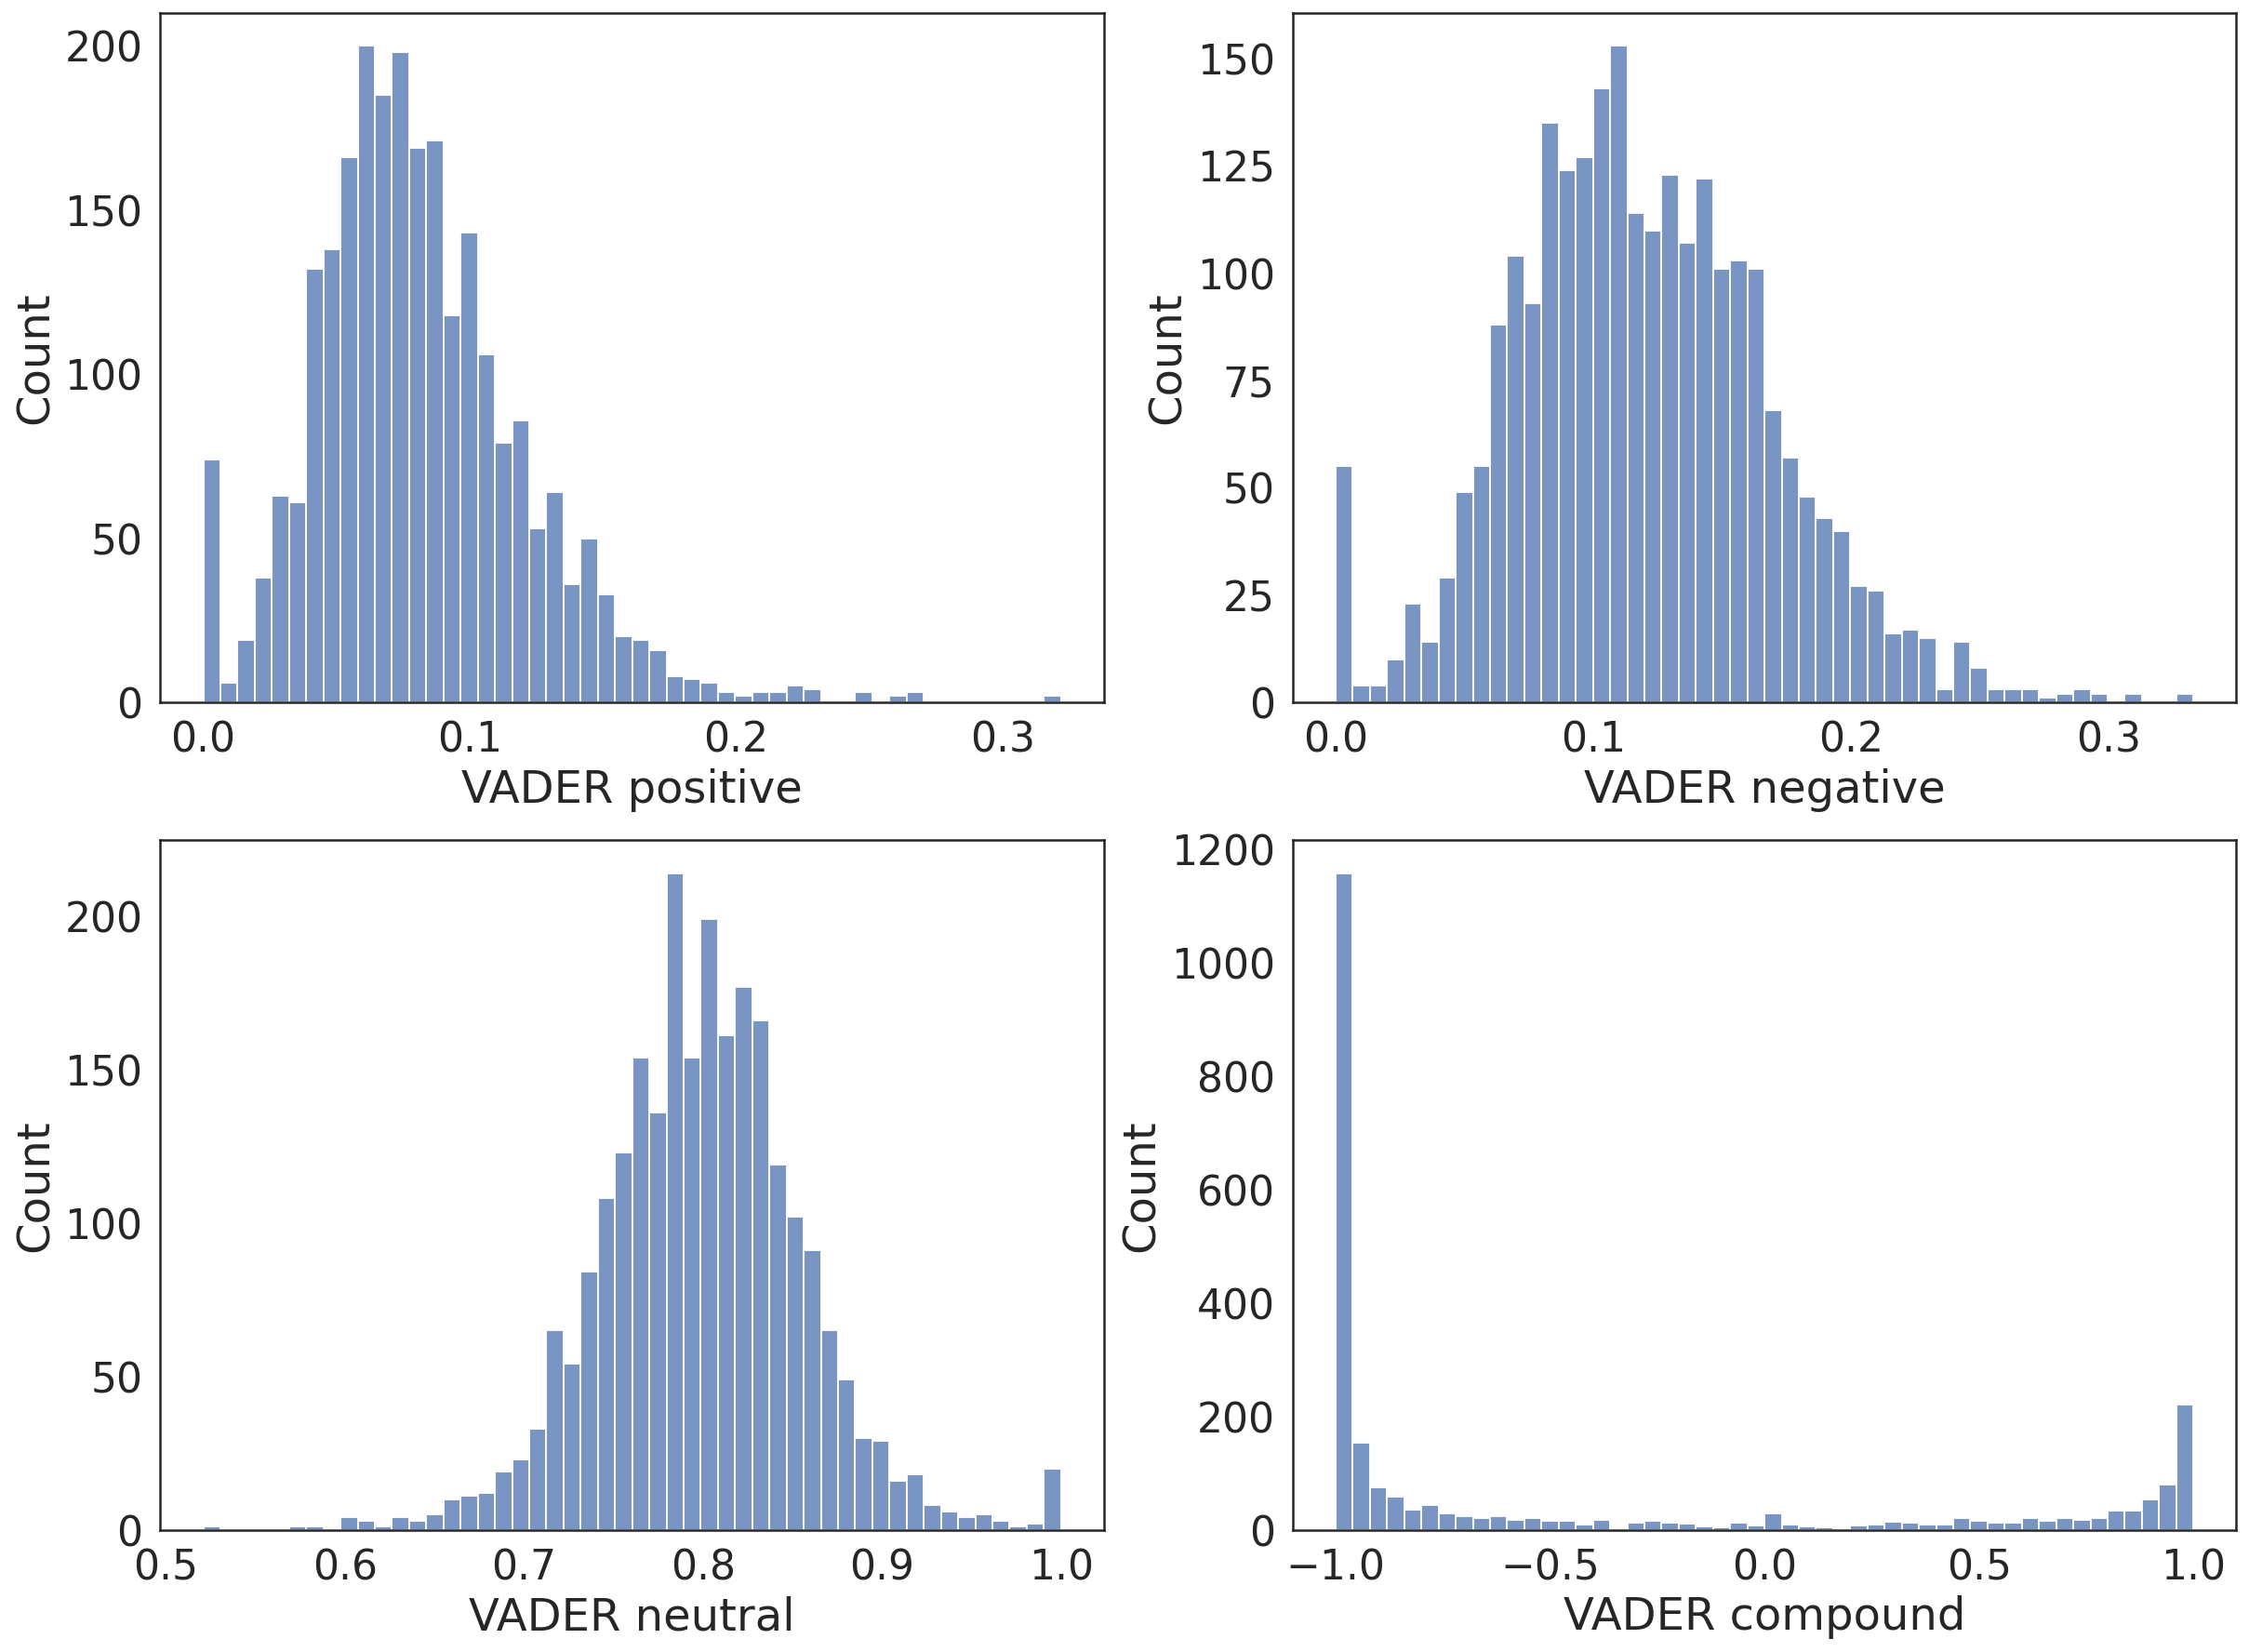

In [24]:
df.head()
fig, ax = plt.subplots(2, 2, figsize=(20,15))
sns.histplot(df['VADER positive'], bins=50, ax=ax[0][0])
sns.histplot(df['VADER negative'], bins=50, ax=ax[0][1])
sns.histplot(df['VADER neutral'], bins=50, ax=ax[1][0])
sns.histplot(df['VADER compound'], bins=50, ax=ax[1][1])

<AxesSubplot:xlabel='TextBlob subjectivity', ylabel='Count'>

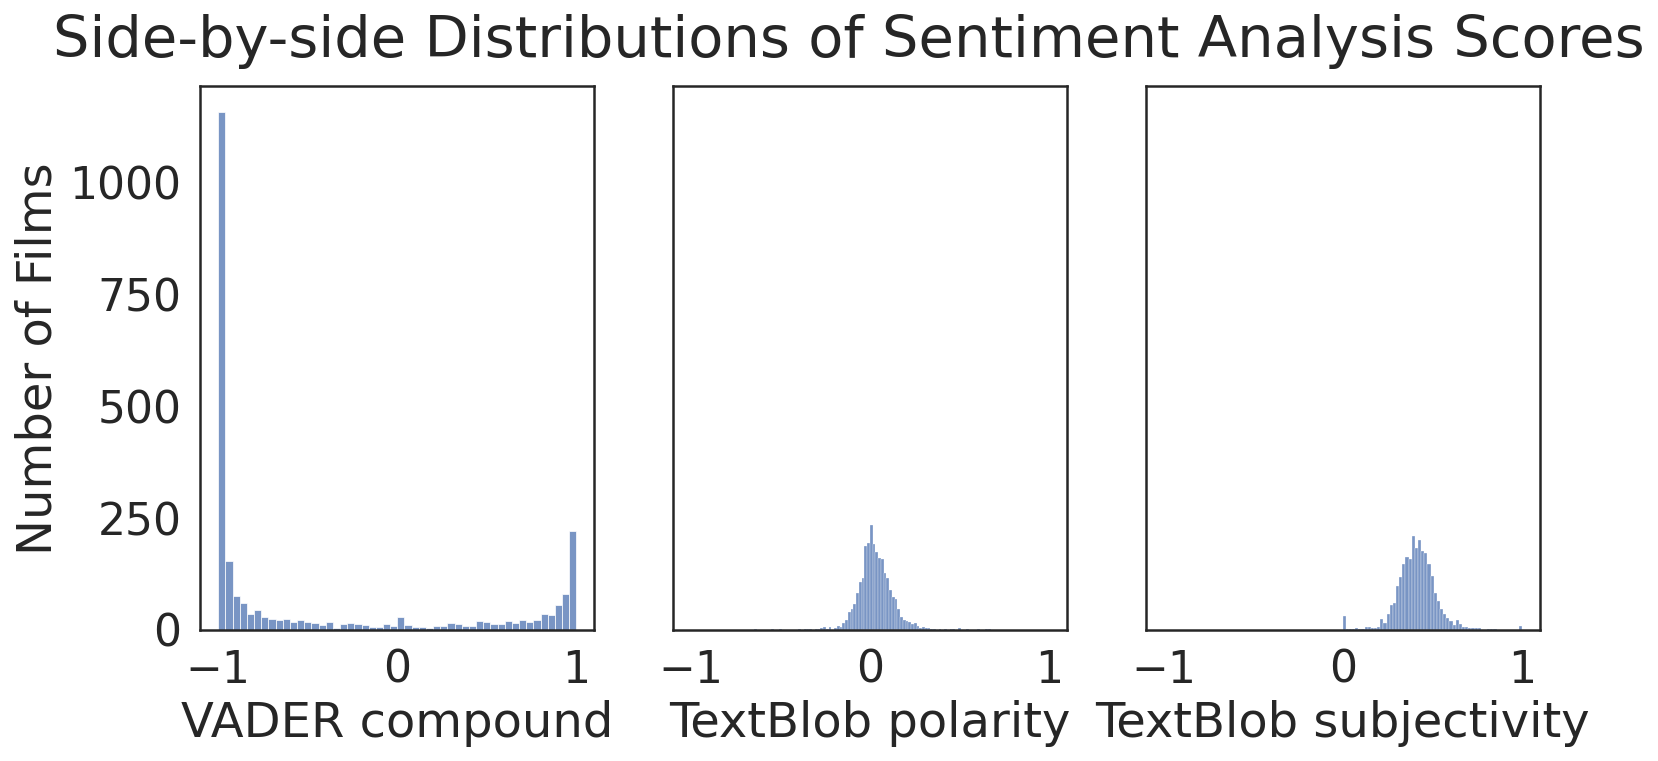

In [25]:
df.head()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.suptitle('Side-by-side Distributions of Sentiment Analysis Scores')
sns.histplot(df['VADER compound'], bins=50, ax=ax[0])
ax[0].set(ylabel='Number of Films')
sns.histplot(df['TextBlob polarity'], ax=ax[1])
sns.histplot(df['TextBlob subjectivity'], ax=ax[2])
#df.head()

#### The VADER Sentiment seems to have a lot more films with negative sentiment, so let's take a closer look at its distribution.

<AxesSubplot:xlabel='VADER compound', ylabel='Count'>

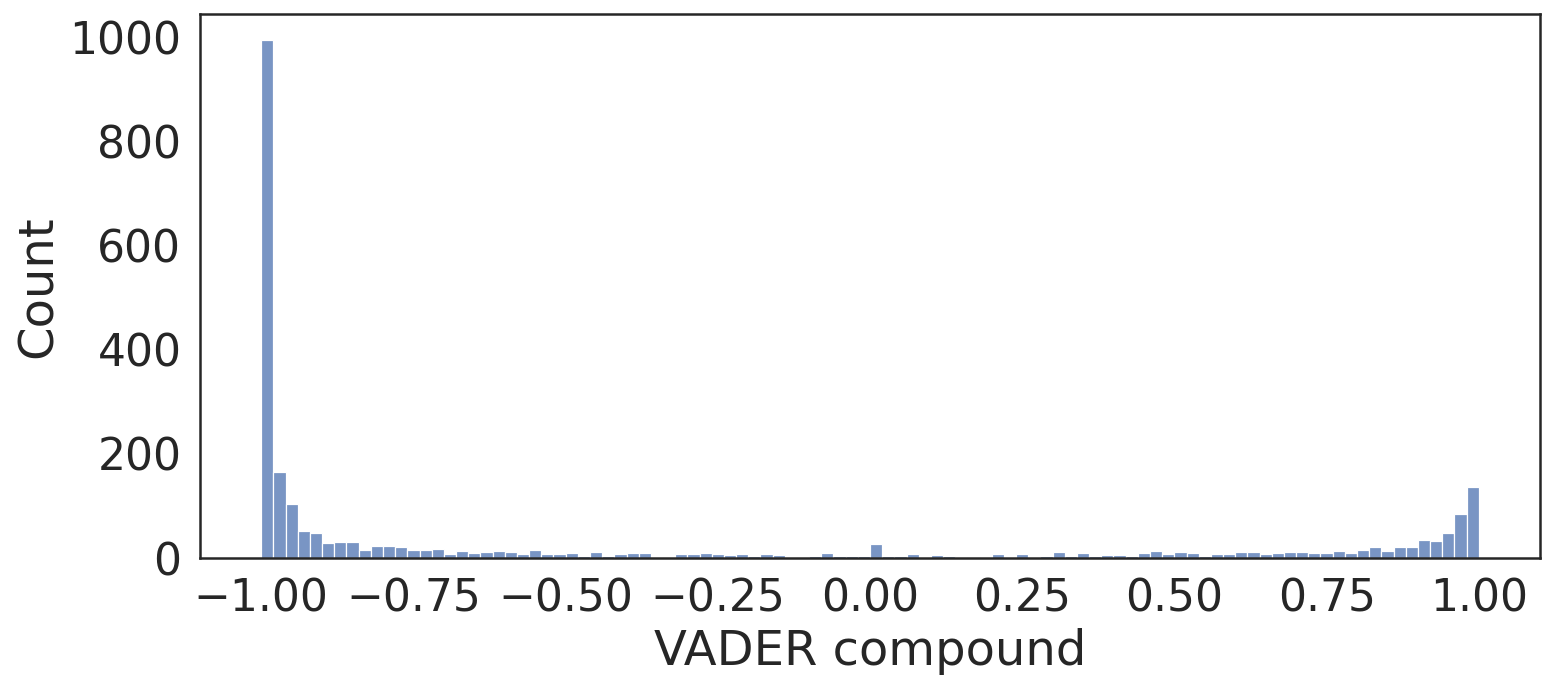

In [69]:
sns.histplot(df['VADER compound'], bins=100)

#### What proportions of films in the dataset have a compound score of less than -0.9 (and thus is considered to be highly negative)?

In [71]:
#see how many films are extremely negative (less than -0.9 VADER sentiment score)
df[df['VADER compound'] < -0.9].shape[0] #1376

#what proportions of films in the dataset have a sentiment score of less than -0.9?
df[df['VADER compound'] < -0.9].shape[0] / df.shape[0] #0.546

0.5449077786688051

Let's see what types of films normally have negative plot sentiments

[Text(0.5, 1.0, 'Highly Negative Film Plots by Genre')]

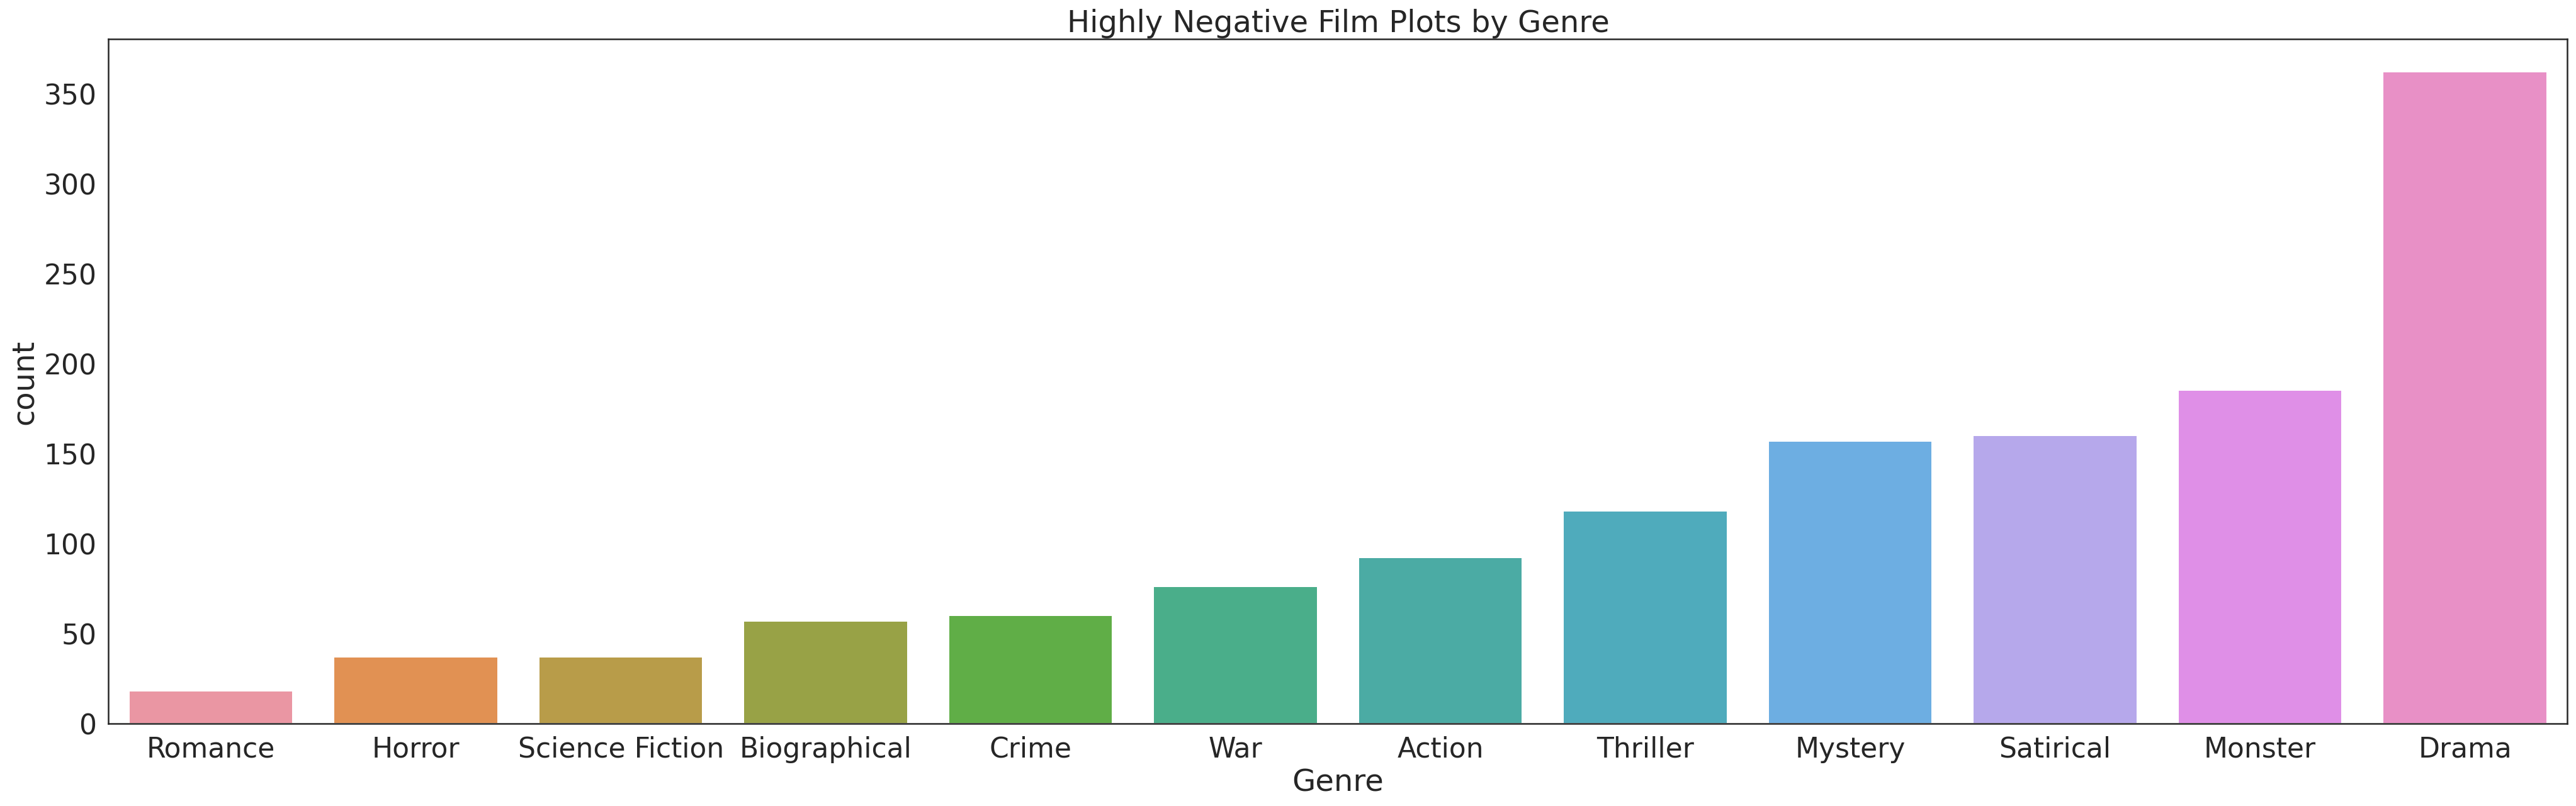

In [80]:
#Create a sub dataframe of just films with sentiment scores of < -0.9 and plot a bar graph to see common genres
very_neg = df[df['VADER compound'] < -0.9]
fig, ax = plt.subplots(figsize= (35, 10))
sns.countplot(data=very_neg, order= very_neg['Genre'].value_counts(ascending=True).index, x='Genre', ax=ax).set(title='Highly Negative Film Plots by Genre')

#### Something interesting to explore is whether certain directors tend to direct movies with more negative Wikipedia Film Plot sentiments:

In [83]:
#see the counts per genre
very_neg.groupby(df['Genre']).count().sort_values(by='Film name', ascending= False)

#Is there a certain director who has directed more negative films?
very_neg.groupby(df['Directed by']).count().sort_values(by='Film name', ascending= False)
#John Farrow has 9 and Roger Corman has 8, a couple have 7

#John Farrow has directed 12 movies in the dataset and 8 have a sentiment score of less than -0.9
df[df['Directed by'] == 'John Farrow'].head()#.Genre.unique()#.shape[0] #12

,Film name,Genre,Plot,Directed by,Written by,Story by,Produced by,Starring,Cinematography,Edited by,Music by,Production company,Distributed by,Release date,Running time,Budget,Box office,Duration (min),Release year,Budget (mil dollar),Box office (mil dollar),VADER Sentiment,VADER negative,VADER neutral,VADER positive,VADER compound,VADER compound (absolute value),TextBlob subjectivity,TextBlob polarity
148,His Kind of Woman,Crime,"Down on his luck, professional gambler Dan Mil...",John Farrow,NaN,Gerald Drayson Adams,Robert Sparks,Robert Mitchum,Harry J. Wild,Frederic Knudtson,Leigh Harline,NaN,RKO Radio Pictures,NaN,120 minutes,NaN,$2 million (US rentals),120.0,NaN,NaN,2.00,"{'neg': 0.16, 'neu': 0.746, 'pos': 0.093, 'com...",0.160,0.746,0.093,-0.9941,0.9941,0.486178,-0.027570
180,The Saint Strikes Back,Crime,"While dancing at a New Year's party, the Saint...",John Farrow,John Twist,NaN,Robert Sisk,George Sanders,Frank Redman,Jack Hively,Roy Webb,NaN,RKO Radio Pictures,"March 10, 1939",64 min.,"$128,000","$460,000",64.0,1939.0,0.128,0.46,"{'neg': 0.14, 'neu': 0.794, 'pos': 0.066, 'com...",0.140,0.794,0.066,-0.9892,0.9892,0.436596,0.036170
216,Commandos Strike at Dawn,War,"Erik Toresen, a widower and peaceful man, is s...",John Farrow,C. S. Forester (story),NaN,Sam Wood,Paul Muni,William C. Mellor,Anne Bauchens,Louis Gruenberg,NaN,Columbia Pictures,"December 30, 1942",100 minutes,NaN,$1.5 million (US rentals),100.0,1942.0,NaN,1.50,"{'neg': 0.15, 'neu': 0.788, 'pos': 0.063, 'com...",0.150,0.788,0.063,-0.8176,0.8176,0.219048,-0.021429
289,Submarine Command,War,"During the Pacific War, Lieutenant Commander K...",John Farrow,Jonathan Latimer (story),NaN,Joseph Sistrom,William Holden,Lionel Lindon,Eda Warren,David Buttolph,NaN,Paramount Pictures,November 1951,87 minutes,NaN,$1 million (US rentals),87.0,1951.0,NaN,1.00,"{'neg': 0.171, 'neu': 0.731, 'pos': 0.098, 'co...",0.171,0.731,0.098,-0.9938,0.9938,0.225510,0.070170
305,Wake Island (film),War,A map is shown with a voiceover giving a brief...,John Farrow,W. R. Burnett,NaN,Joseph Sistrom,Brian Donlevy,William C. Mellor,Frank Bracht,David Buttolph,NaN,Paramount Pictures,NaN,88 minutes,"$826,000",$3.5 million (U.S. and Canada rentals),88.0,NaN,0.826,3.50,"{'neg': 0.143, 'neu': 0.814, 'pos': 0.043, 'co...",0.143,0.814,0.043,-0.9972,0.9972,0.251453,-0.011985


### Is there an association between films with extreme sentiment and high box office sales?
We use the absolute value of Vader Compound scores to see both highly negative and highly positive films.  

<AxesSubplot:xlabel='VADER compound (absolute value)', ylabel='Box office (mil dollar)'>

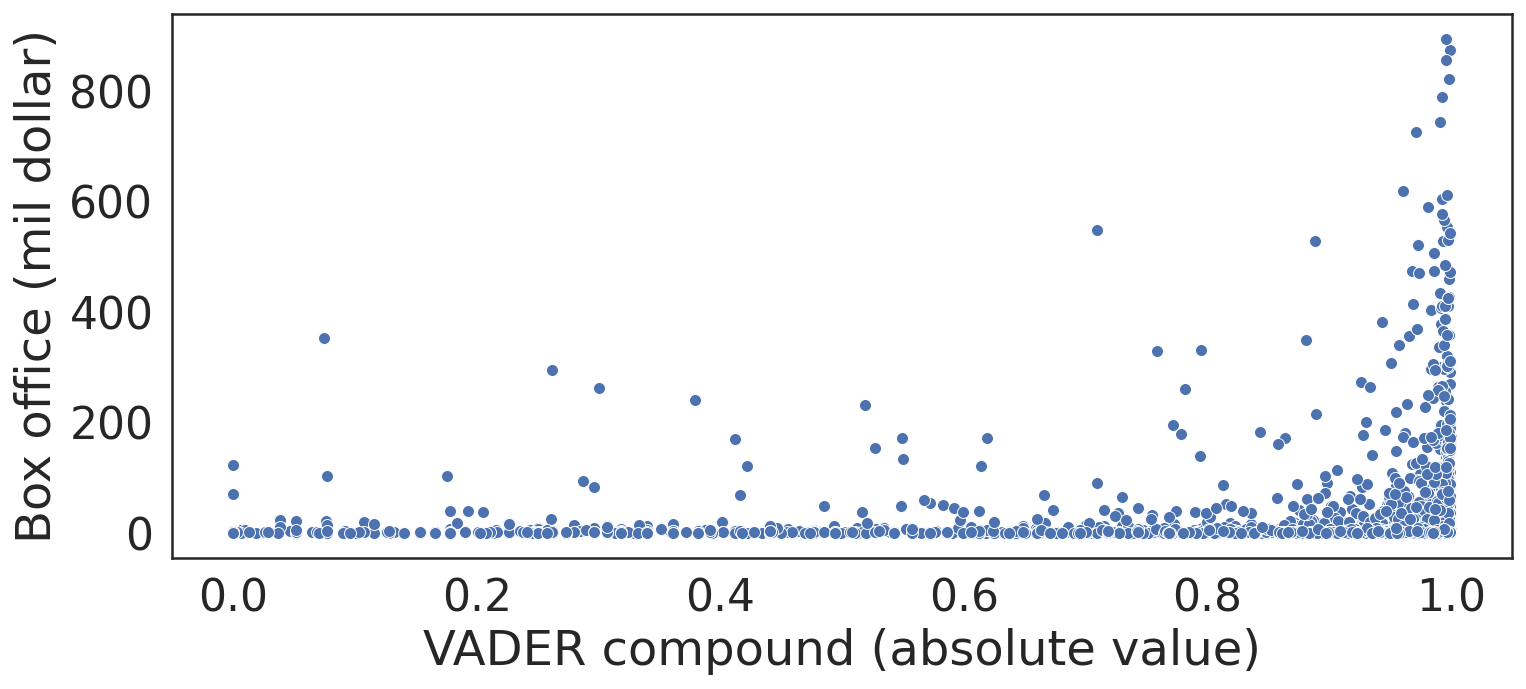

In [92]:
sns.scatterplot(data=df, x='VADER compound (absolute value)', y= 'Box office (mil dollar)')

### Looking at highly extreme values from 0.9-1.0 and exploring whether Genre plays a role

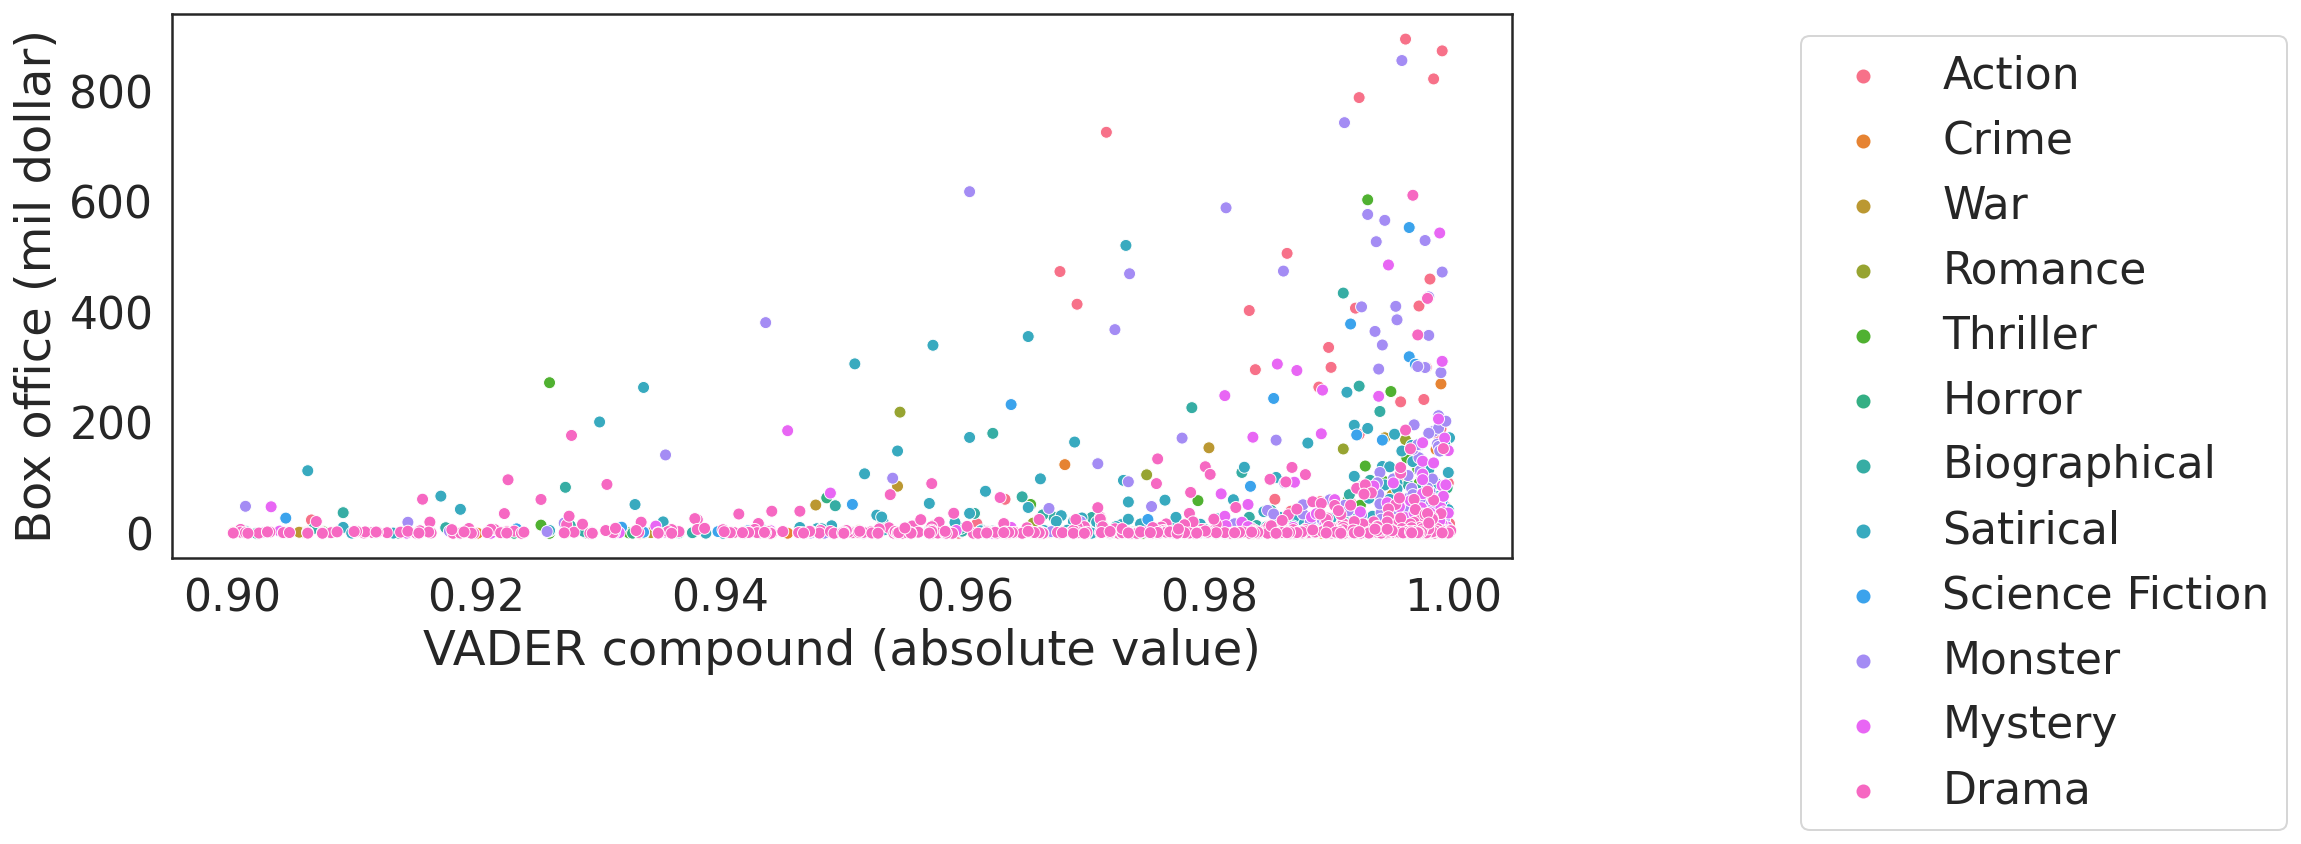

In [98]:
extreme_val = df[df['VADER compound (absolute value)'] > 0.9]
extreme_plt = sns.scatterplot(data=extreme_val, x='VADER compound (absolute value)', y= 'Box office (mil dollar)', hue='Genre')
extreme_plt.legend(bbox_to_anchor= (1.2,1))


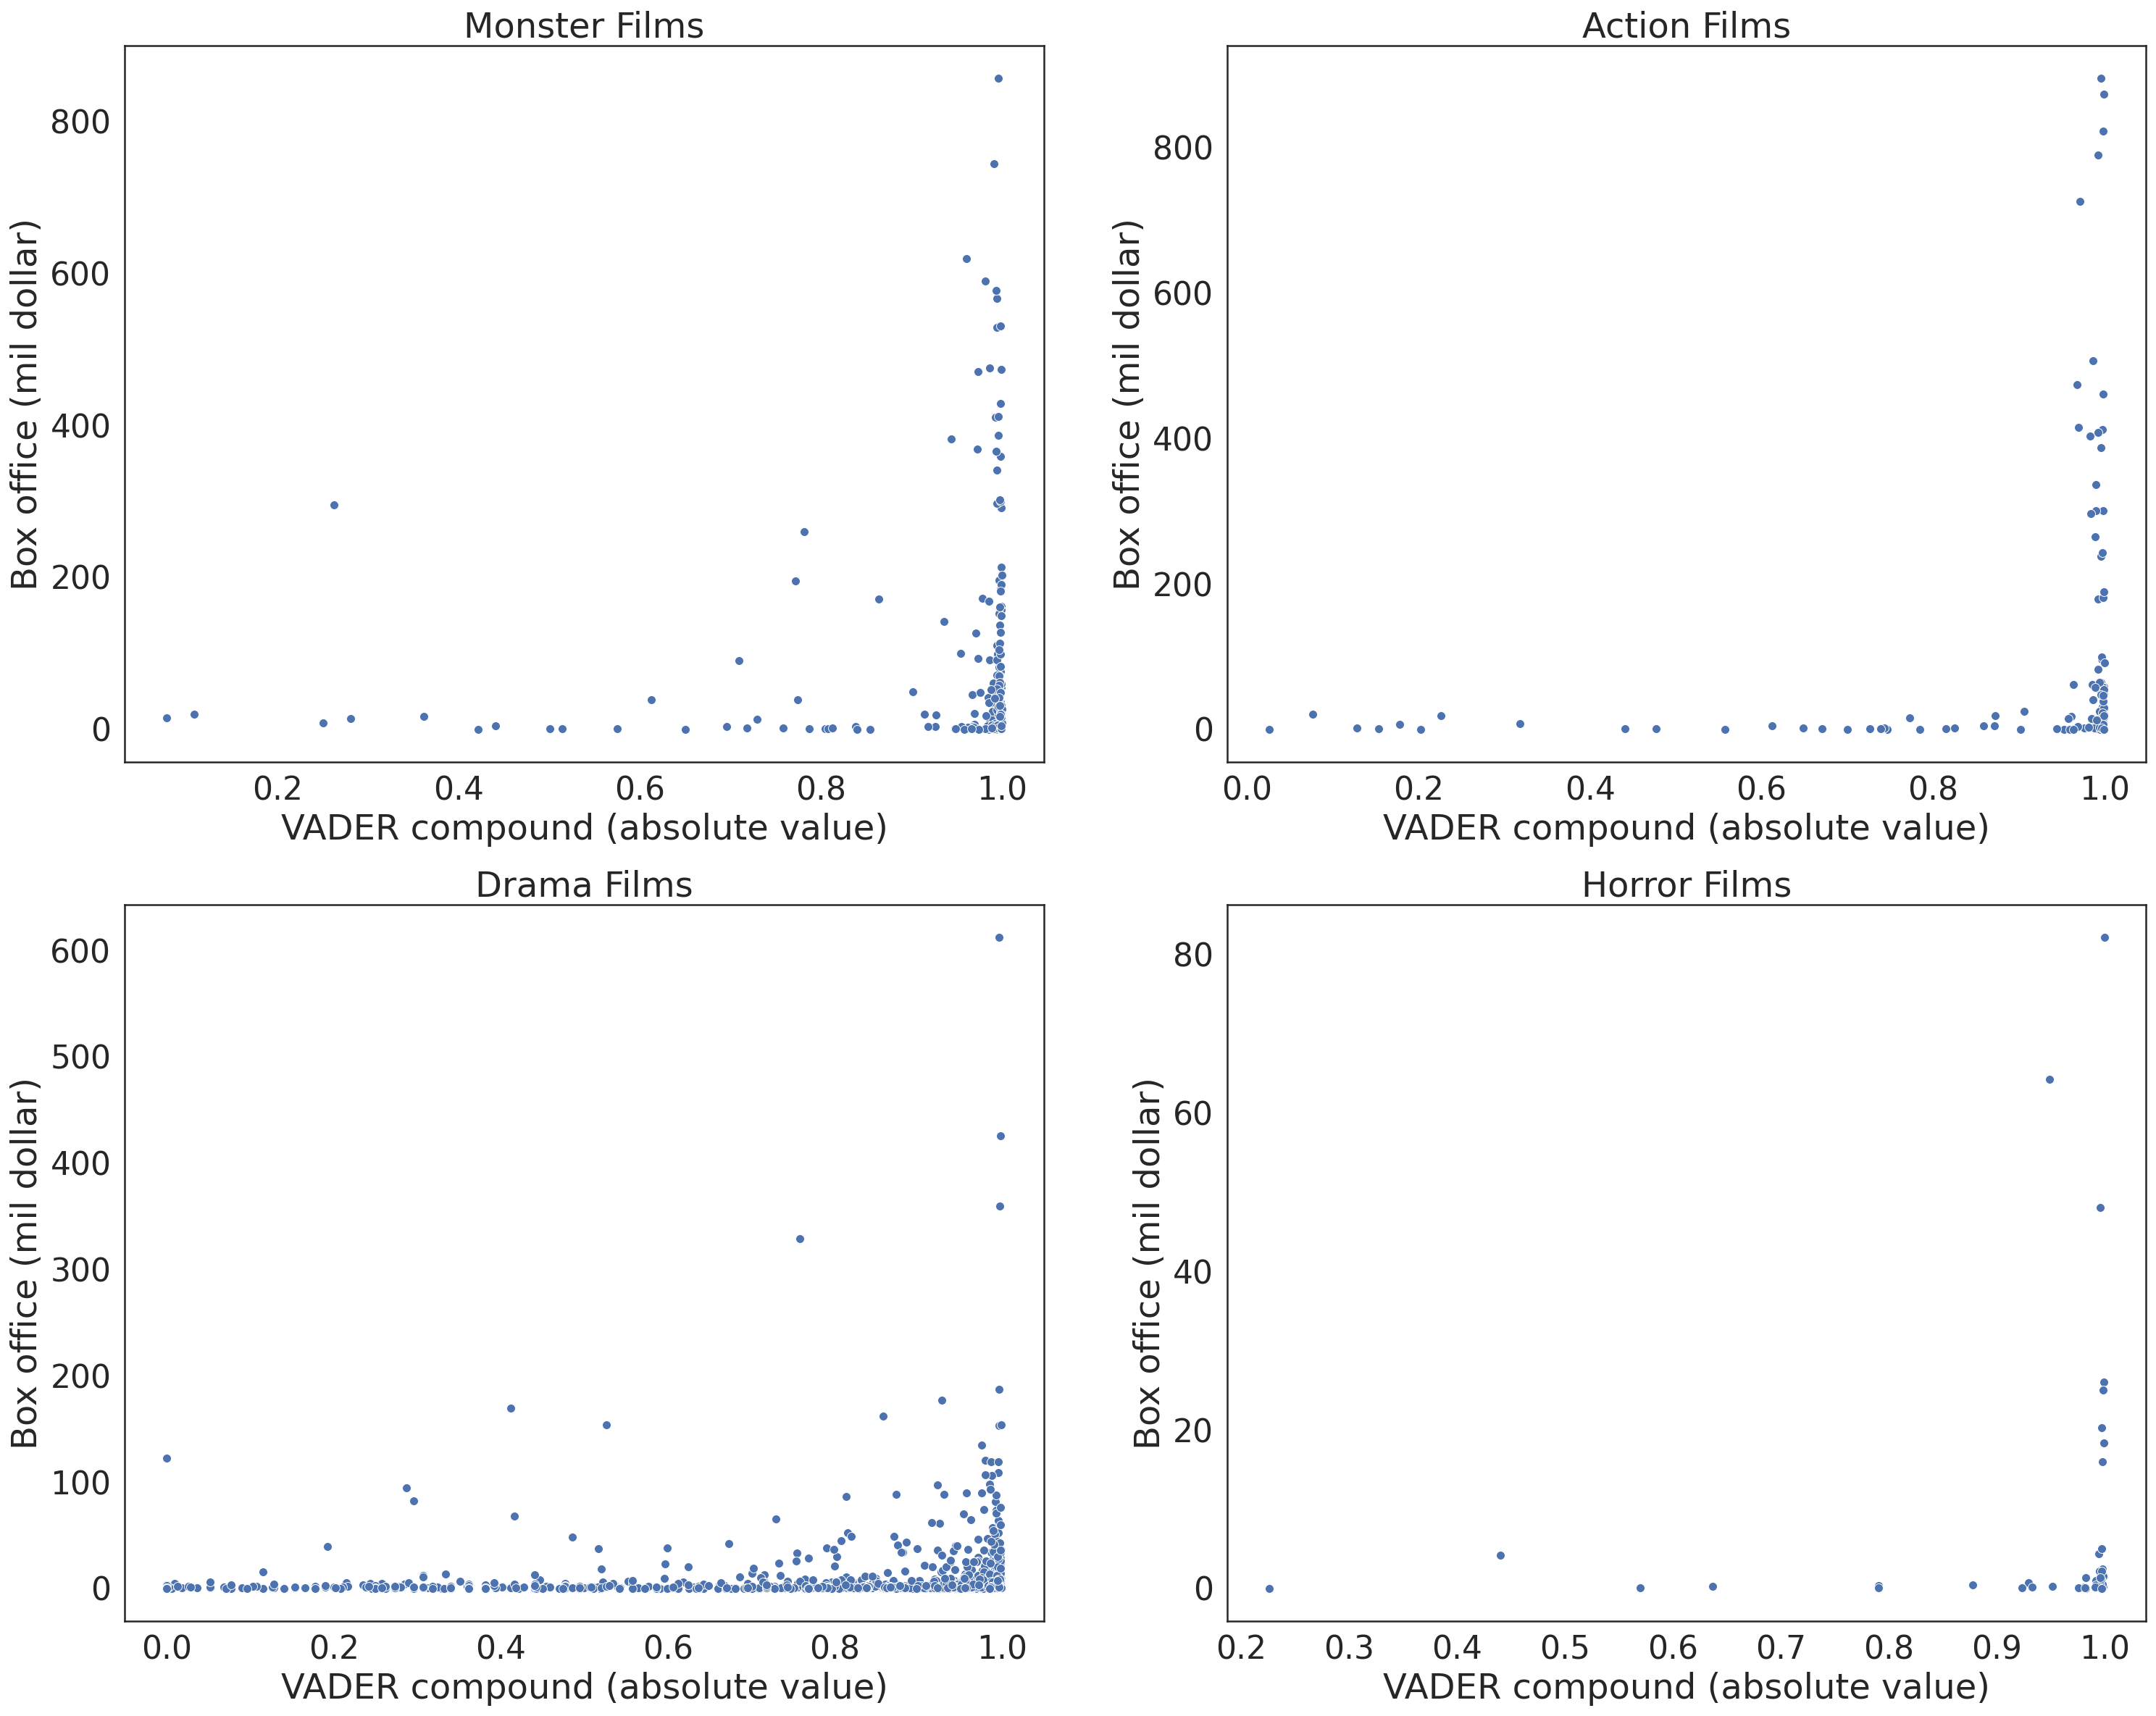

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
monster= df[df['Genre']=='Monster']
sns.scatterplot(data=monster, x='VADER compound (absolute value)', y= 'Box office (mil dollar)', ax=ax[0][0]).set(title='Monster Films')
action = df[df['Genre']=='Action']
sns.scatterplot(data=action, x='VADER compound (absolute value)', y= 'Box office (mil dollar)', ax=ax[0][1]).set(title='Action Films')
action = df[df['Genre']=='Action']
drama = df[df['Genre']=='Drama']
sns.scatterplot(data=drama, x='VADER compound (absolute value)', y= 'Box office (mil dollar)', ax=ax[1][0]).set(title='Drama Films')
action = df[df['Genre']=='Action']
horror = df[df['Genre']=='Horror']
sns.scatterplot(data=horror, x='VADER compound (absolute value)', y= 'Box office (mil dollar)', ax=ax[1][1]).set(title='Horror Films')
action = df[df['Genre']=='Action']


There appears to be an association between high VADER compound scores and high box office sales. However, there are also some outliers, and many high scores with low box office sales. 
From the figure, it seems like Action and Monster movies generally have movies with higher box plot sales and VADER compound scores. 